# Fresnel equations

Here, we check the functioning of Fresnel equations, that is, how a plane wave reflects and refracts on a plane surface. The refractive index of the media are n1 for the incicent media and n2 for the second media. The second media can be absorbent $n_c = n + i \kappa$.

For the computations, we have used two ways: 

    - fresnel_equations_kx: When the plane plane is defined as k = (kx, kz).
  
    - fresnel_equations: When the plane wave is define by the angle. 

We have also methods to determine the reflectance and transmittance.

    - transmitances_reflectances_kx

    - transmitances_reflectances

One of the parameters of the funcions is 'ouput'. It admits a list of 4 booleans to check whether we want to compute this parameter or not. The order is:

    - t_TM, t_TE, r_TM, r_TE


Also, inside each method, we can obtain the drawing of the Fresnel equation or the reflectance. The parameters are:

    - has_draw: boolean
    - kind: 'amplitude_phase' or real_imag

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from diffractio import um, mm, degrees
from diffractio.utils_optics import fresnel_equations_kx, fresnel_equations, transmitances_reflectances_kx, transmitances_reflectances


## Fresnel with kx

We introduce the vector kx, which is useful mainly for algorithm programming.

In [3]:
wavelength = 0.6328*um
n1 = 1
n2 = 1.5

n2c = 1 + 5j

k0 = 2 * np.pi / wavelength


theta = np.linspace(0.01, np.pi/2-0.01, 361)



/home/luismiguel/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


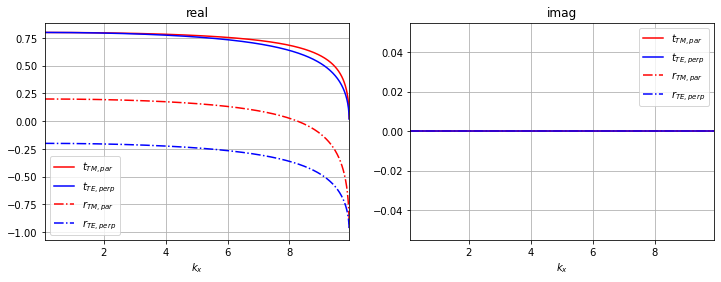

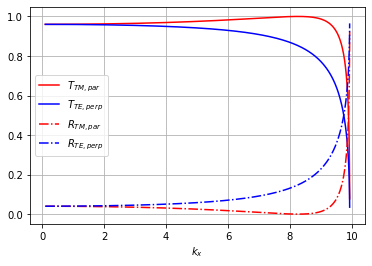

In [4]:

# Here is the kx parameter, which need to be computed in the input side.

kx = k0 * n1 * np. sin(theta)


t_TM, t_TE, r_TM, r_TE = fresnel_equations_kx(kx,wavelength,  n1, n2, has_draw=True, kind='real_imag')
t_TM, t_TE, r_TM, r_TE = transmitances_reflectances_kx(kx, wavelength, n1, n2, has_draw=True)

## Fresnel with angles $\theta$

This case is more suitable to understand what happens at the boundaries of a surface

In [5]:
wavelength = 0.6328*um
n1 = 1
n2 = 1.5

n2c = 1 + 5j

k0 = 2 * np.pi / wavelength


theta = np.linspace(0.001, np.pi/2-0.001, 361)



### $n_2 > n_1$ 

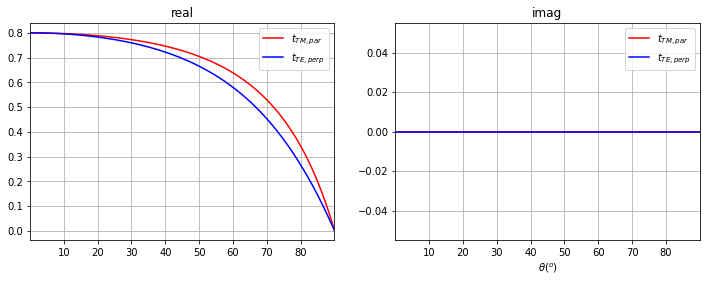

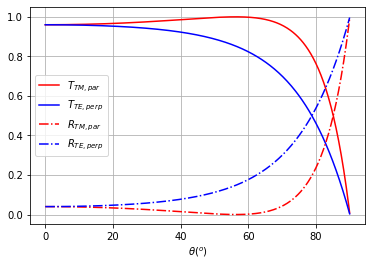

In [6]:
t_TM, t_TE, r_TM, r_TE = fresnel_equations(theta, wavelength, n1, n2, [1,1,0,0], has_draw=True, kind='real_imag')

T_TM, T_TE, R_TM, R_TE = transmitances_reflectances(theta ,wavelength, n1, n2, has_draw=True)


We can se Brewster angle.

### $n_2 < n_1$ 

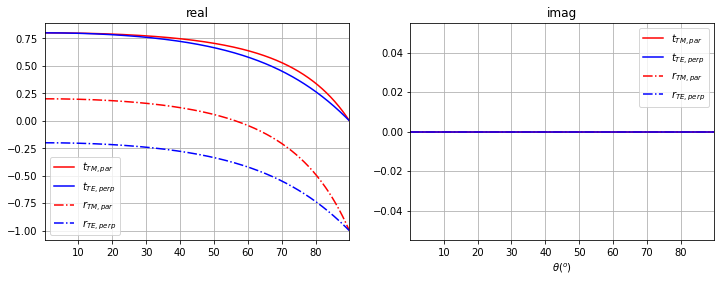

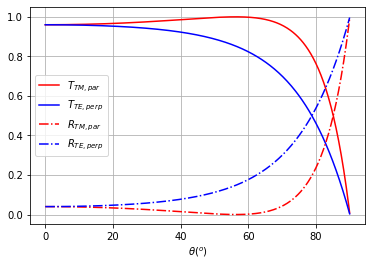

In [7]:
t_TM, t_TE, r_TM, r_TE = fresnel_equations(theta, wavelength, n1, n2, has_draw=True, kind='real_imag')

T_TM, T_TE, R_TM, R_TE = transmitances_reflectances(theta ,wavelength, n1, n2, has_draw=True)


### $n_2 > n_1$ 

Here total internal refraction is clear. i nthe amplitude/phase representation.

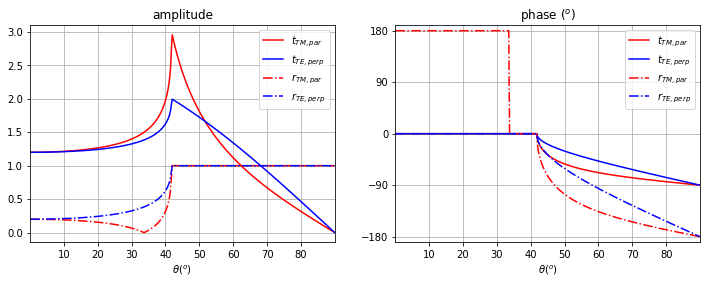

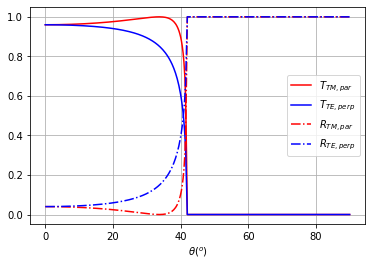

In [8]:
t_TM, t_TE, r_TM, r_TE = fresnel_equations(theta ,wavelength, n2, n1, has_draw=True, kind='amplitude_phase')
T_TM, T_TE, R_TM, R_TE = transmitances_reflectances(theta ,wavelength,  n2, n1, has_draw=True)


**Phase difference between the two polarizations**

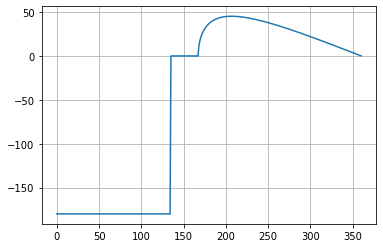

In [9]:
plt.plot((np.angle(r_TE)-np.angle(r_TM))/degrees)
plt.grid()

### $n_2 = n + i \kappa$

This case is when the second medium present a complex refractive index, as in metals.

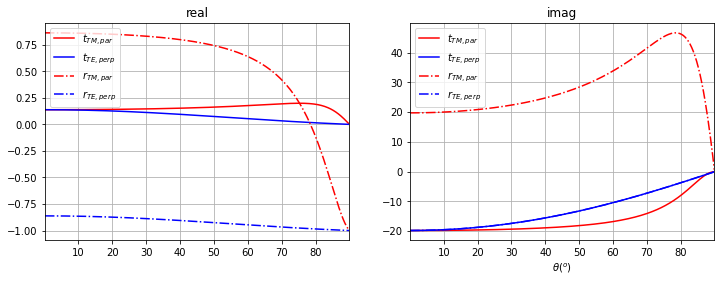

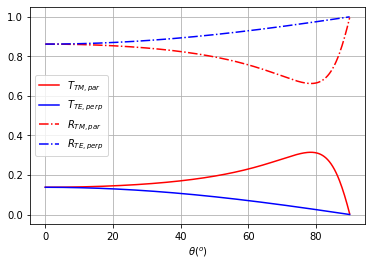

In [10]:
t_TM, t_TE, r_TM, r_TE = fresnel_equations(theta, wavelength, n1, n2c, has_draw=True, kind='real_imag')
T_TM, T_TE, R_TM, R_TE = transmitances_reflectances(theta, wavelength,  n1, n2c, has_draw=True)


**Phase difference between the two polarizations**

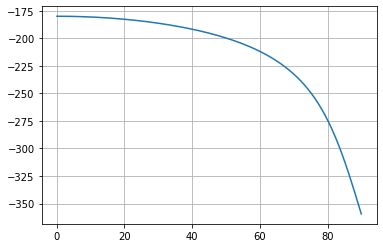

In [11]:
plt.plot(theta/degrees, (np.angle(r_TE)-np.angle(r_TM))/degrees)
plt.grid()

### $n_1 = n + i \kappa$

This case is more strange, as the first medium is complex, it absorbs the light field, but it may be interesing when it is a thin metallic layer.

In [12]:
n2c = 1 + 1j

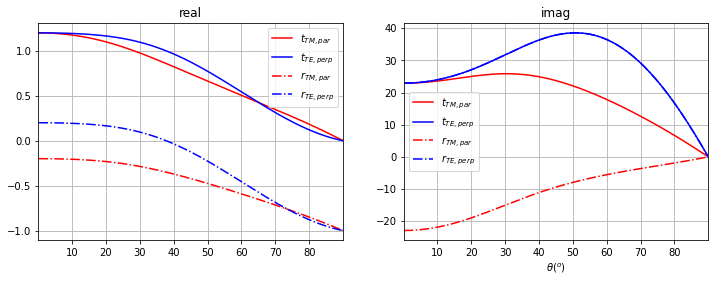

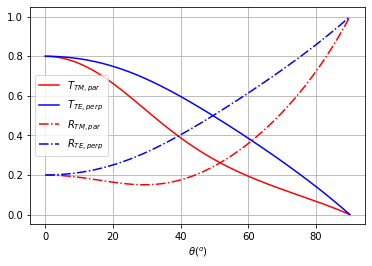

In [13]:
t_TM, t_TE, r_TM, r_TE = fresnel_equations(theta, wavelength, n2c, n1, has_draw=True, kind='real_imag')
T_TM, T_TE, R_TM, R_TE = transmitances_reflectances(theta, wavelength,  n2c, n1, has_draw=True)


**Phase difference between the two polarizations**

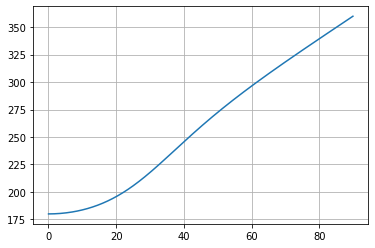

In [14]:
plt.plot(theta/degrees, (np.angle(r_TE)-np.angle(r_TM))/degrees)
plt.grid()